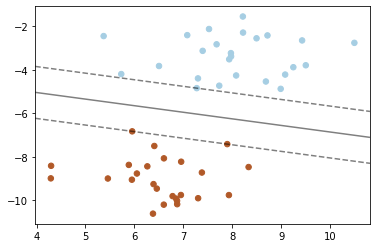

In [3]:
# linear SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=6)

clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()        # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

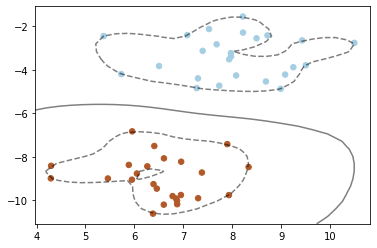

In [11]:
# rbf kernel SVM (radial basis function)
clf_rbf = svm.SVC(kernel='rbf', gamma='auto', C=1000) # higher the gamma, more complex (higher dimension) the model
clf_rbf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()        # get current axis
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
plt.show()

In [15]:
# SVM in Regression (SVR)
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

for kernel in ('linear', 'rbf'):
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print('{} model train score: {:.3f}'.format(kernel, svr.score(X_train, y_train)))
    print('{} model test score: {:.3f}'.format(kernel, svr.score(X_test, y_test)))
    

linear model train score: 0.709
linear model test score: 0.696
rbf model train score: 0.192
rbf model test score: 0.222


In [19]:
# pre-processing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for kernel in ('linear', 'rbf'):
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('{} model train score: {:.3f}'.format(kernel, svr.score(X_train_scaled, y_train)))
    print('{} model test score: {:.3f}'.format(kernel, svr.score(X_test_scaled, y_test)))

linear model train score: 0.706
linear model test score: 0.698
rbf model train score: 0.665
rbf model test score: 0.695


In [20]:
# tune rbf model hyperparameter
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('tuned rbf model train score: {:.3f}'.format(svr.score(X_train_scaled, y_train)))
print('tuned rbf model test score: {:.3f}'.format(svr.score(X_test_scaled, y_test)))

tuned rbf model train score: 0.966
tuned rbf model test score: 0.894
